**Descriptive Statistics & Probability**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/original_aerofit_treadmill.csv_1639992749.txt')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Observations about data set
1. dataset has total of 180 rows of data and no missing values
2.The frequency of product KP281 is highest (80 rows)
3.Age: 18-50 yrs age group are using the product mostly with a mean age of 28.79yrs
4.Most of the people utilizing the product are Males and are Partnered couples
5. On an Average, people are intending to use the treadmills for 3.46 days a week
6.On a scale of 1-5, most people have averaged to a fitness level of 3.3


Quantitative attributes

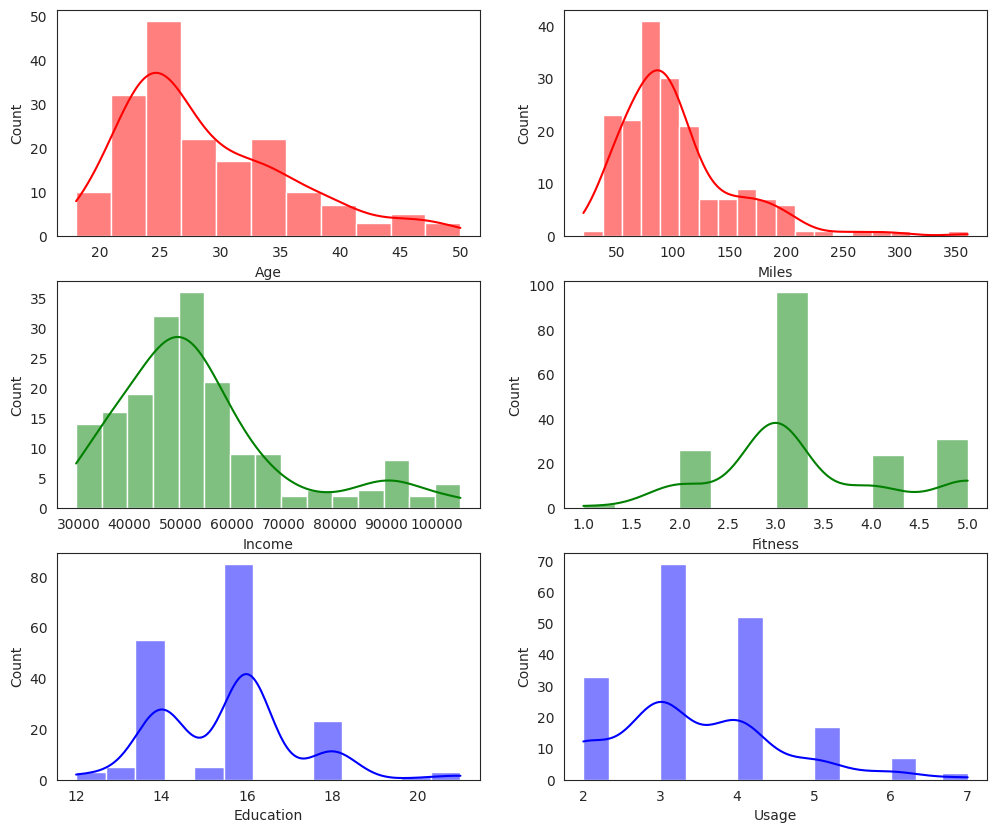

In [ ]:
fig,axis=plt.subplots(3,2,figsize=(12,10))

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0],color='red')
sns.histplot(data=df, x="Miles", kde=True, ax=axis[0,1],color='red')
sns.histplot(data=df, x="Income", kde=True, ax=axis[1,0],color='green')
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1],color='green')
sns.histplot(data=df, x="Education", kde=True, ax=axis[2,0],color='blue')
sns.histplot(data=df, x="Usage", kde=True, ax=axis[2,1],color='blue')
plt.show()

*Observations for quantitative attributes*

AGE: Max no. of the people in the dataset are 24-26 years old

INCOME: highest income ranges are 45000-55000

EDUCATION: aroun 80+ people have an 16yrs of education

MILES: Around 40 customers run for around 70-90miles/week

FITNESS: Around 100+ people have fitness score of 3+

USAGE: Most of them tend to use the treadmill around 3 times a week

In [ ]:
def age_category(x):
  if x <= 24:
      return '<= 24 '
  elif 25 <= x <= 33:
      return '25 - 33'
  elif 34 <= x <= 46:
      return '34 - 46'
  else:
      return '> 46'
df['age_bins'] = df['Age'].apply(age_category)
df['age_bins'].loc[np.random.randint(0, 180, 10)]

15      <= 24 
28     25 - 33
138    34 - 46
8       <= 24 
14      <= 24 
86      <= 24 
59     25 - 33
32     25 - 33
14      <= 24 
97     25 - 33
Name: age_bins, dtype: object

OUTLIERS in Quantitative Attributes

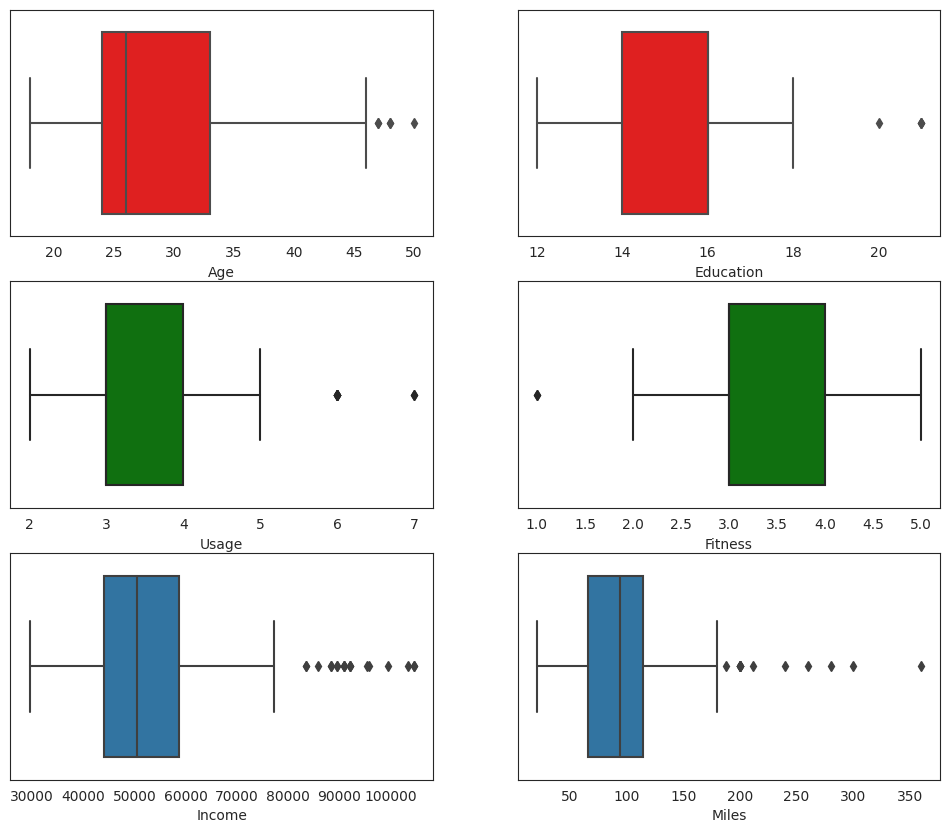

In [ ]:
fig,axis=plt.subplots(3,2,figsize=(12,10))

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0],color='red')
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1],color='red')
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0],color='green')
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1],color='green')
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Observations

*Income* and *Miles* have large number of outliers in comparison to other quantitative attributes which have very less outliers

**Percentage calculation of categorical variables**

1. KP281 is purchased by 44.44% , KP481 by 33.33% and KP781 by 22.22% customers
2. 59.44% of customers are Married
3. 57.78% of customers are Males

In [ ]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)*100

value
variable      value               
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556
Product       KP281      44.444444
              KP481      33.333333
              KP781      22.222222

**Bivariate Analysis**

Correlation between measurable quantities

-The customer with high fitness scale is more likely to run or
walk more miles.
-The customer who expects to use the treadmill more times in a week generally expects to walk or run more miles in the week.
-The customer who have a high fitness scale generally uses the treadmill more frequently in a week.

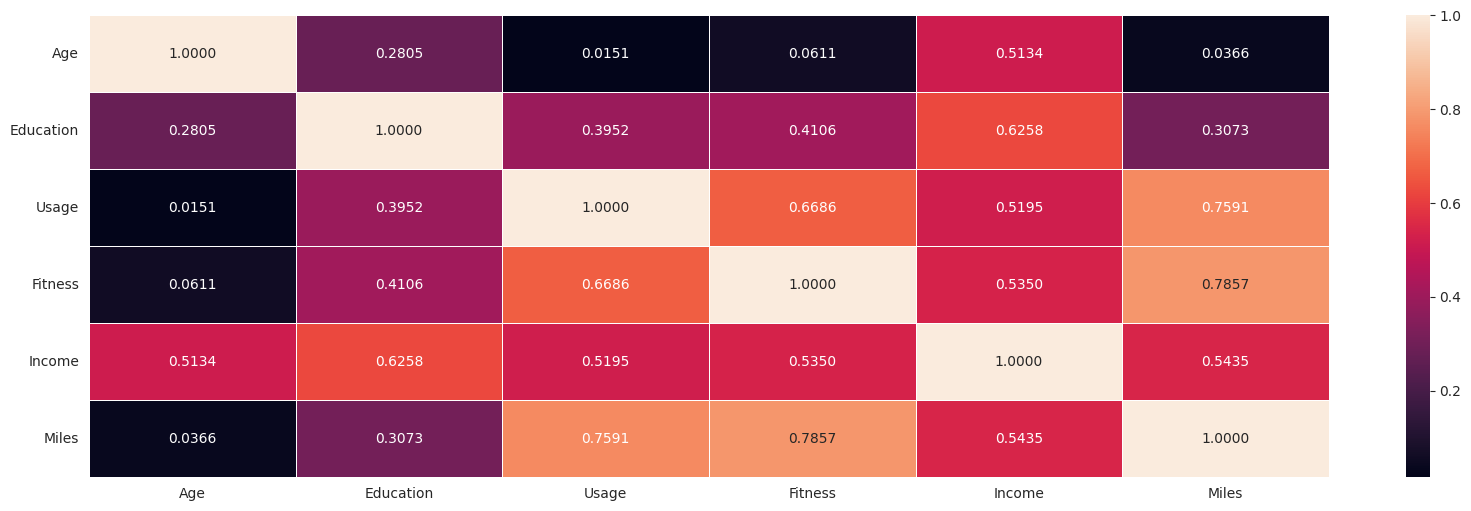

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5)
plt.yticks(rotation=0)
plt.show()

Product Analysis - Pair Plot

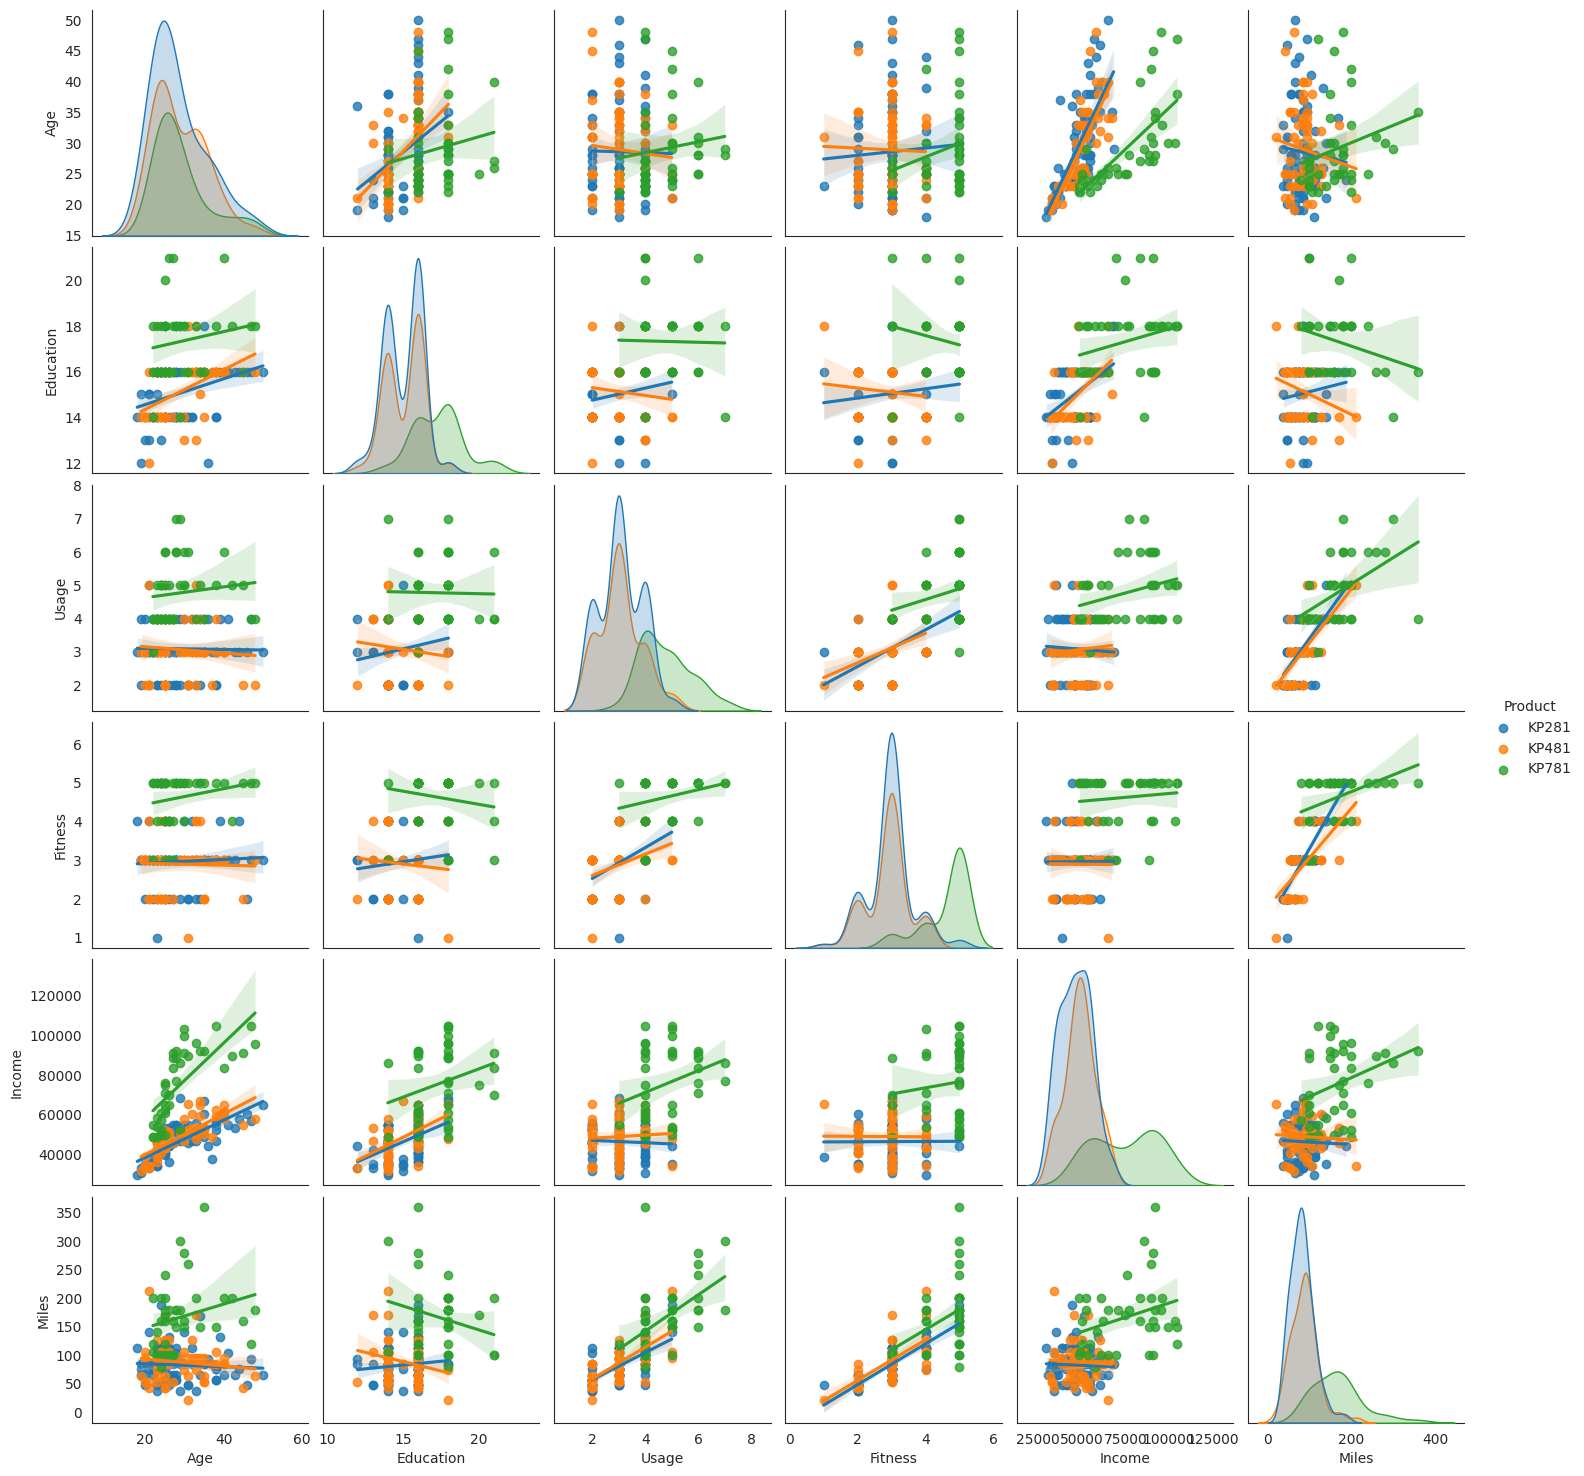

In [ ]:
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

Product stats among Partnered and Single

KP281 is the most preferred among both Single and Partnered customers

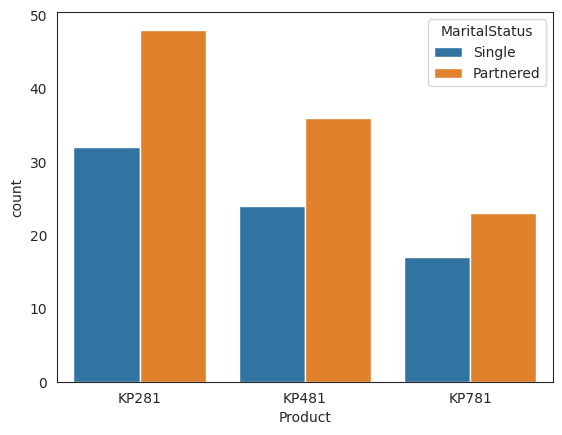

In [ ]:
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.show()

GENDER AND PRODUCT ANALYSIS

Among both male and female kp281 is the most favoured product

KP781 is majorily preferred by Male customers

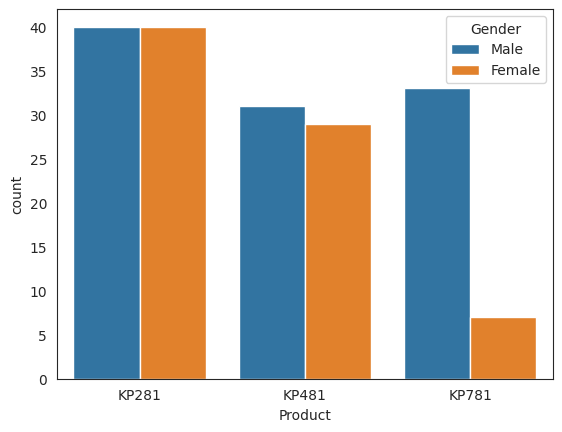

In [ ]:
sns.countplot(data=df,x='Product',hue='Gender')
plt.show()

GENDER AND USAGE ANALYSIS

Male customers usage is 4 days per week
Female customers usage is 3 days per week

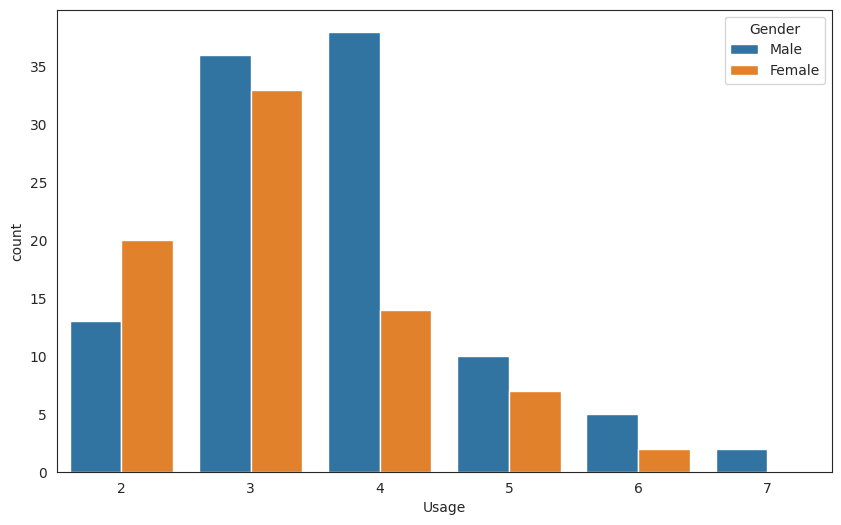

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Usage',hue='Gender')
plt.show()

Checking if quantitative attributes have any effect on the product purchased:

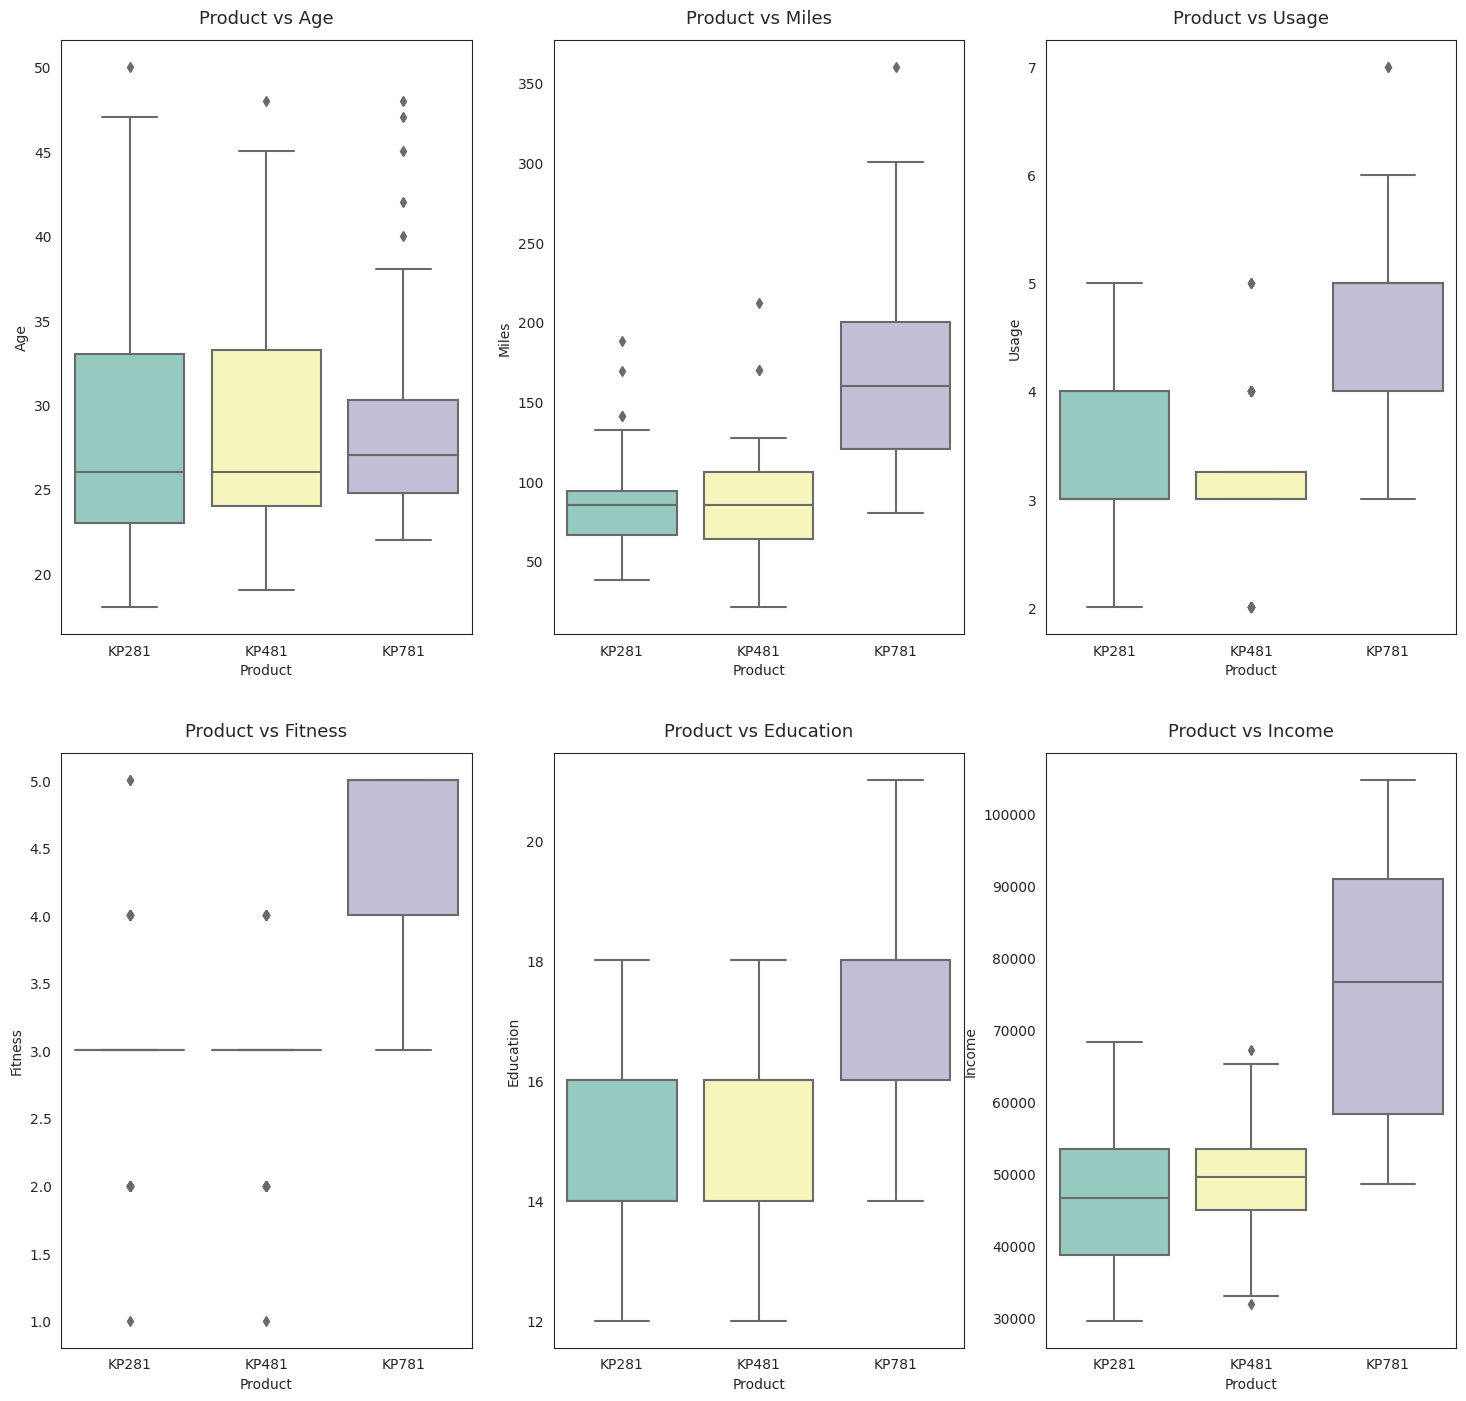

In [ ]:
attrs = ['Age', 'Miles', 'Usage', 'Fitness', 'Education', 'Income']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

**Product vs Age**
Customers purchasing products KP281 & KP481 are having same Age median value.Customers whose age lies between 25-30, are more likely to buy KP781 product

**Product vs Education**
Customers whose Education is greater than 16, have more chances to purchase the KP781 product.

**Product vs Usage**
Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchasing KP281 or KP481.

**Product vs Fitness**
The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

**Product vs Income**
Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

**Product vs Miles**
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.


**Product usage among different age groups seggregated by Gender**

From the catplot, male customers are equally distributed among the three product types
Female customers tend to use product KP281 and KP481 more than advanced KP781 product

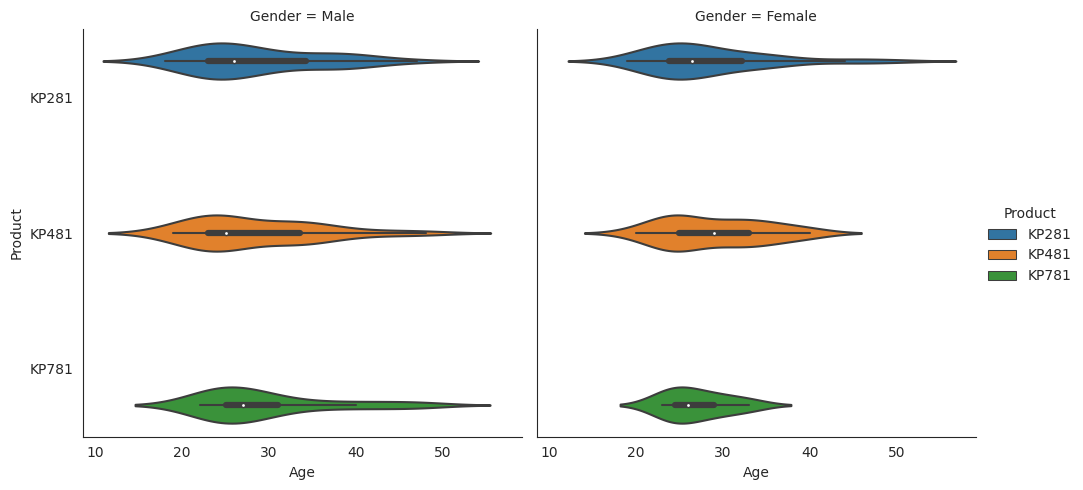

In [ ]:
sns.catplot(x='Age',y='Product',hue='Product',col='Gender',data=df,kind='violin')
plt.show()

**Marginal Probability**

In [ ]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

**Conditional Probability**

Probability of each product given gender

In [ ]:
def gender_Probability(gender,df):
    print(f"Prob P(KP781) for {gender}: {round(df['KP781'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(df['KP481'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(df['KP281'][gender]/df.loc[gender].sum(),3)}")

df_temp = pd.crosstab(index=df['Gender'],columns=[df['Product']])
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(df),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(df),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


**Probability of each product given MaritalStatus**

In [ ]:
def MS_Probability(ms_status,df):
    print(f"Prob P(KP781) for {ms_status}: {round(df['KP781'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(df['KP481'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(df['KP281'][ms_status]/df.loc[ms_status].sum(),3)}")

df_temp = pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(df),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


Marginal probability

In [ ]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


Marginal Probability of any customer buying

product KP281 is : 44.44 % (cheapest / entry level product)

product KP481 is : 33.33 % (intermediate user level product)

product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

Conditional probability

In [ ]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

Highlights of Products:

**KP281**

KP281 is the most popular and affordable product among the entry level customers with 3-4 days/week of usage. beginner level customers in all age groups have preferred this product over the other two. Income range between 39K to 53K have preferred this product.

**KP481**


KP481 is the second most popular product among the customers.
Customers Prefer this product mostly to cover more miles than fitness.Probability of Female customer buying KP481 is significantly higher than male. Average Income of the customer who buys KP481 is 49K. The age range of KP481 treadmill customers is roughly between 24-34 years.

KP781

Due to the High Price & being the advanced type, this product is least preferred by the customers. Customers who use this product have higher fitness scale rating. Usage of this product is 4-5 times/week. Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).
Average Income of KP781 buyers are over 75K. This product is preferred by the customer where the correlation between Education and Income is High.

**Recommendation**

KP281 & KP481 treadmills are preferred by the customers whose annual income is in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.

As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

KP481 product is specifically recommended for Female customers who are intermediate user.

Females using the products are comparitively very low in number, hence marketing campaigns should be run to increase awareness of these products usages among this group

Target the Age group above 40 years to recommend Product KP781.